In [ ]:
# Calcoli delle prestazioni
import time
from numba import jit, njit
import random
import numpy as np

def add_csv(add:list):
    with open(file='./numba.csv', mode='a', encoding='utf-8') as fp:
        fp.write(str(add) + '\n')

# Un miliardo
for x in range(10):
    def valore_con_tassa(qtt):
        for i in range(qtt):
            nuovo_valore = qtt * 1.1
    avvio = time.time()
    valore_con_tassa(1000000000)
    fine = time.time()
    tempo = round(fine - avvio, 2)
    string = 'Miliardo' + ',' + str(tempo) + ',' + 'N'
    add_csv(string)

for x in range(10):
    @njit
    def valore_con_tassa(qtt):
        for i in range(qtt):
            nuovo_valore = qtt * 1.1
    avvio = time.time()
    valore_con_tassa(1000000000)
    fine = time.time()
    tempo = round(fine - avvio, 2)
    string = 'Miliardo' + ',' + str(tempo) + ',' + 'S'
    add_csv(string)

# Array Numpy
array = np.random.randint(1000, 10000, 10000000)

for x in range(10):
    def valore_con_tassa(lista):
        aumento_totale = 0
        for x in lista:
            if x > 5000:
                valore = x * 1.1
            else:
                valore = x
            aumento_totale += valore - x
        return aumento_totale
    avvio = time.time()
    valore_con_tassa(array)
    fine = time.time()
    tempo = round(fine - avvio, 2)
    string = 'Array' + ',' + str(tempo) + ',' + 'N'
    add_csv(string)

array = np.random.randint(1000, 10000, 10000000)

for x in range(10):
    @njit
    def valore_con_tassa(lista):
        aumento_totale = 0
        for x in lista:
            if x > 5000:
                valore = x * 1.1
            else:
                valore = x
            aumento_totale += valore - x
        return aumento_totale
    avvio = time.time()
    valore_con_tassa(array)
    fine = time.time()
    tempo = round(fine - avvio, 2)
    string = 'Array' + ',' + str(tempo) + ',' + 'S'
    add_csv(string)

# Tempo di eseguimento 8m 45.9s

### `Analisi Esplorativa`

In [ ]:
csv_base = './numba.csv'

In [ ]:
def valore_abbreviato(valore:str) -> str:
    alg_valore = list(valore)
    num_punt = sum(map(lambda x: x == '.', valore))
    for x in range(num_punt):
     alg_valore.remove('.')
    numero = int("".join(alg_valore))
    numero_format = "{:,}".format(numero).replace(",", ".")
    return numero_format

In [ ]:
import pandas as pd
df = pd.read_csv(csv_base, na_values='na')

struttura = df.shape
struttura = str(struttura).replace('(', '').replace(')', '')
struttura = str(struttura).strip().split(sep=',')
print(f'Inormazioni dei dati: {valore_abbreviato(struttura[0])} righe e {valore_abbreviato(struttura[1])} colonne.')

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes('object').describe().transpose() # freq / count = %

In [ ]:
df.isna().any()

In [ ]:
print(df[df['operazione'] == 'Miliardo'].shape)
print(df[df['operazione'] == 'Array'].shape)

In [ ]:
qtd_totale, _ = df.shape
qtd_elemento, _ = df[df['operazione'] == 'Miliardo'].shape
print(f'Totale: {valore_abbreviato(str(qtd_totale))} e elemento cercato: {valore_abbreviato(str(qtd_elemento))}')
print(f"La proporzione dell'elemento cercato è: {round(100 * qtd_elemento / qtd_totale, 2)}%")

### `Grafici e numeri`

Inormazioni dei dati: 40 righe e 3 colonne.
dati prelevati in circa: 8.71 Minuti
------------------------------------- 

La media di Miliardo N è: 42.24 secondi
La media di Miliardo S è: 0.04 secondi
99.91% 

La media di Array N è: 9.89 secondi
La media di Array S è: 0.1 secondi
98.99% 



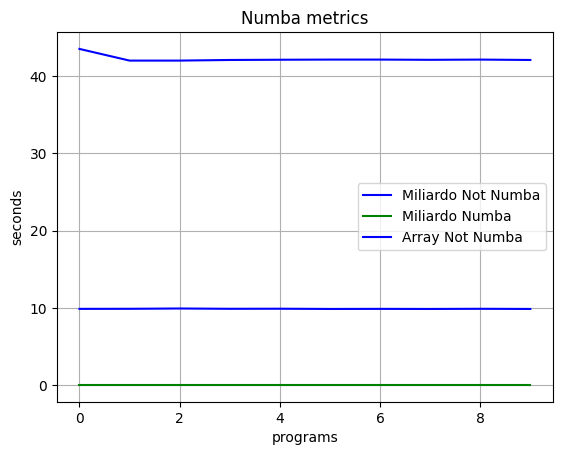



-------------------------------------
Durata: 0.2 secondi


In [12]:
# Prestazioni di Numba
###------------------------------------------------------####

from functools import reduce
import matplotlib.pyplot as plt
import pandas as pd
import time

from adige import ArquivoCSV

avvio = time.time()
csv_base = './numba.csv'

# Analisi esplorativa
###------------------------------------------------------####

df = pd.read_csv(csv_base, na_values='na')

def valore_abbreviato(valore:str) -> str:
    alg_valore = list(valore)
    num_punt = sum(map(lambda x: x == '.', valore))
    for x in range(num_punt):
     alg_valore.remove('.')
    numero = int("".join(alg_valore))
    numero_format = "{:,}".format(numero).replace(",", ".")
    return numero_format

struttura = df.shape
struttura = str(struttura).replace('(', '').replace(')', '')
struttura = str(struttura).strip().split(sep=',')
print(f'Inormazioni dei dati: {valore_abbreviato(struttura[0])} righe e {valore_abbreviato(struttura[1])} colonne.')

csv = ArquivoCSV(csv_base)
durata_prelevati = csv.extrair_coluna(1)
durata_prelevati = list(map(float, durata_prelevati))
durata_prelevati = reduce(lambda x, y: x + y, durata_prelevati) / 60.0
print(f'dati prelevati in circa: {round(durata_prelevati, 2)} Minuti')
print("------------------------------------- \n")

# Numeri
###------------------------------------------------------####

def media(op:str, numba:str):
    valori = []
    with open(file=csv_base, mode='r', encoding='utf-8') as fp:
        line = fp.readline()
        line = fp.readline()
        while line:
            line = line.strip().split(sep=',')
            if (line[0] == op) & (line[2] == numba):
                valori.append(float(line[1]))
                line = fp.readline()
            else:
                line = fp.readline()

    somma = reduce(lambda x, y: x + y, valori)
    media_totale = somma / len(valori)
    lista = valori

    return round(float(media_totale), 2), lista

miliardo = media(op='Miliardo', numba='N')[0]
print(f'La media di Miliardo N è: {miliardo} secondi')
num1 = miliardo
miliardo = media(op='Miliardo', numba='S')[0]
print(f'La media di Miliardo S è: {miliardo} secondi')
num2 = miliardo
differenza = num1 - num2
percentuale = (differenza / num1) * 100
print(f'{round(percentuale, 2)}% \n')

array = media(op='Array', numba='N')[0]
print(f'La media di Array N è: {array} secondi')
num1 = array
array = media(op='Array', numba='S')[0]
print(f'La media di Array S è: {array} secondi')
num2 = array
differenza = num1 - num2
percentuale = (differenza / num1) * 100
print(f'{round(percentuale, 2)}% \n')

# Grafici
###------------------------------------------------------####

def grafici():

  x = []
  y1 = media(op='Miliardo', numba='N')[1]
  y2 = media(op='Miliardo', numba='S')[1]
  y3 = media(op='Array', numba='N')[1]

  totale = len(media(op='Miliardo', numba='N')[1])
  ordine = -1
  for i in range(totale):
      ordine += 1
      x.append(ordine)
  
  plt.plot(x,y1,color='blue',label='Miliardo Not Numba')
  plt.plot(x,y2,color='green',label='Miliardo Numba')
  plt.plot(x,y3,color='blue',label='Array Not Numba')
  plt.legend()
  plt.title('Numba metrics')
  plt.xlabel('programs')
  plt.ylabel('seconds')
  plt.grid()
  plt.savefig('Numba metrics')
  plt.show()

grafici()

###------------------------------------------------------####
fine = time.time()
print('\n')
print("-------------------------------------")
print(f'Durata: {round((fine - avvio), 2)} secondi')

Developed by Enzo Schitini 😉